# To apply the K-means algorithm to the Iris dataset

### Import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
import csv

###K-means clustering algorithm

In [2]:
def k_means_clustering(dataset, k, max_iterations=100):
    # Remove the last column ('Species') and store it for future comparison
    species = dataset[:, -1]
    dataset = dataset[:, :-1]

    # Normalize the dataset
    dataset = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

    # Initialize centroids randomly
    np.random.seed(42)
    centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]

    # Iterate until convergence or max_iterations reached
    for _ in range(max_iterations):
        # Calculate distances between each point and centroids
        distances = np.sqrt(np.sum((dataset[:, np.newaxis] - centroids)**2, axis=2))

        # Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([dataset[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, species


### To load the Iris dataset

In [3]:
def load_iris_dataset(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        dataset = list(reader)

    # Convert dataset to numpy array
    dataset = np.array(dataset)

    # Remove the header row
    dataset = dataset[1:]

    # Extract the 'Species' column
    species = dataset[:, -1]

    # Convert numerical columns to float
    dataset = dataset[:, :-1].astype(float)

    return dataset, species


 ### The function returns the cluster labels assigned to each data point in the dataset.

In [4]:
def k_means_clustering(dataset, k, max_iterations=100):
    # Normalize the dataset
    dataset = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

    # Initialize centroids randomly
    np.random.seed(42)
    centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]

    # Iterate until convergence or max_iterations reached
    for _ in range(max_iterations):
        # Calculate distances between each point and centroids
        distances = np.sqrt(np.sum((dataset[:, np.newaxis] - centroids)**2, axis=2))

        # Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([dataset[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels

In [5]:
# Load the Iris dataset
file_path = '/content/Iris Dataset.csv'
iris_dataset, species = load_iris_dataset(file_path)


In [6]:
# Apply K-Means Clustering
k = 3
labels = k_means_clustering(iris_dataset, k)


### To print the cluster labels obtained from the K-means clustering algorithm

In [7]:
# Print the cluster labels and actual species
print("Cluster Labels:")
print(labels)
print("Actual Species:")
print(species)

Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Actual Species:
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-se

###Visualize the clusters obtained from the K-means clustering algorithm using a scatter plot

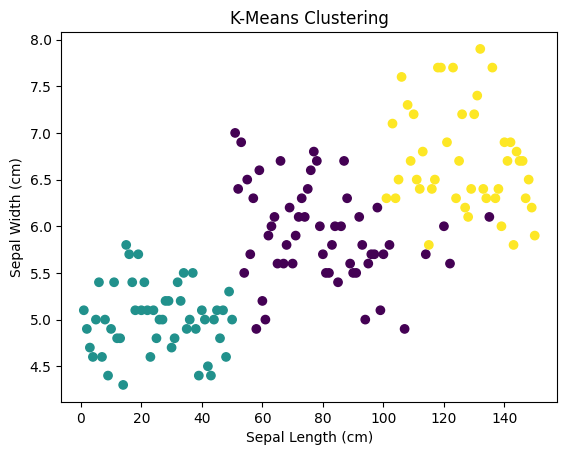

In [8]:
# Visualize the clusters
plt.scatter(iris_dataset[:, 0], iris_dataset[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

### Assess the quality of the clustering results.

In [9]:
# Calculate the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(species, labels)

# Print the ARI
print("Adjusted Rand Index (ARI):", ari)

Adjusted Rand Index (ARI): 0.8859501978730681
